In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
height=[185,170,168,179,182,188,180,180,183,180,180,177]
weight=[72,56,60,68,72,77,71,70,84,88,67,76]
age=[52,36,60,68,42,55,21,70,24,68,32,58]
data=pd.DataFrame({'height':height,'weight':weight,'age':age})

In [3]:
data

,height,weight,age
0,185,72,52
1,170,56,36
2,168,60,60
3,179,68,68
4,182,72,42
5,188,77,55
6,180,71,21
7,180,70,70
8,183,84,24
9,180,88,68


In [17]:
def center_selection(data):
    centers_no=int(input("Enter no. of centers: "))
    features_name=list(data.head(0))
    centers=[]
    for i in range(centers_no):
        centers.append(list(data.iloc[i,:]))
    return centers_no,features_name,centers
centers_no,features_name,centers=center_selection(data)

Enter no. of centers: 3


In [18]:
centers

[[185, 72, 52], [170, 56, 36], [168, 60, 60]]

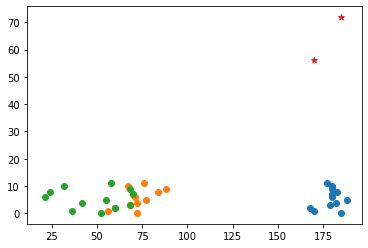

In [6]:
y=np.arange(12)
centerlabel=list(zip(centers[0],centers[1]))
plt.scatter(data['height'],y)
plt.scatter(data['weight'],y)
plt.scatter(data['age'],y)
plt.scatter(centerlabel[0],centerlabel[1],marker="*")
plt.show()

In [21]:

def get_final_center():
    for i in range(centers_no-1,len(data)):
        to_update_center=[]
        dist_cluster=[]
        center=0  
        try:
            while center !=len(centers):
                center_col=0
                distence=0
                to_update_center.append(data.iloc[i,center])
                while center_col !=len(features_name):
                    distence+=(data.iloc[i,center_col]-centers[center][center_col])**2
        #               print(data.iloc[i,center_col],centers[center][center_col])
                    center_col+=1
                print(math.sqrt(distence))
                center+=1
                dist_cluster.append(math.sqrt(distence))
        except:
            continue
        min_index=dist_cluster.index(min(dist_cluster))
        for l in range(len(centers)):
            centers[min_index][l]=(centers[min_index][l]+to_update_center[l])/len(features_name)
    return centers

In [22]:
get_final_center()

85.59267272461273
90.51016055248887
85.96120763522924
105.96982744445913
105.81419904149381
100.77714483855303
102.84057844801353
99.83957639678349
99.66794435138107
112.82177306157084
110.97186954315937
109.94593776632388
99.52361532631735
94.2727342474831
93.49446345852895
108.28032609835671
108.25046529835974
109.54396157485394
107.6027186893955
104.33298637987923
104.0335747939499
114.78885343019296
110.81126963916093
114.69333001728899
98.13859880557713
93.35754488876465
94.55079369720856
103.64290251719454
102.41518149359582
103.1071131998156


[[87.79012345679013, 33.913580246913575, 26.185185185185187],
 [89.03749428440786, 37.3328760859625, 26.467764060356654],
 [91.31611034903216, 40.070720926688004, 13.29614388050602]]

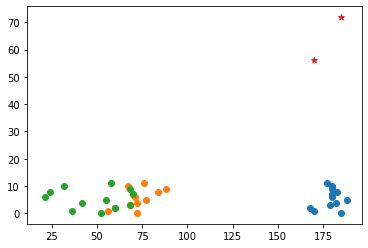

In [77]:
y=np.arange(12)
centerlabel=list(zip(centers[0],centers[1]))
plt.scatter(data['height'],y)
plt.scatter(data['weight'],y)
plt.scatter(data['age'],y)
plt.scatter(centerlabel[0],centerlabel[1],marker="*")
plt.show()

In [52]:
centerlabel

[(185, 170), (72, 56), (52, 36)]